CONTENTS
1. Importing Library and Data files
2. Data Preprocessing and Checking Outliers 
3. Visualizations
4. Models Training 
        A.Linear Regression
        B.Ridge Regression
        C.Lasso Regression
        D.Decision Tree Bagging Regression
        E.Random Forest Regression
        F.Gradient Boosting Regression
        G.XGBoost Regression
5. Result Comparison
6. Prediction
7. Answers of the Project


# Importing Library and Data files

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# IMPORTING DATA FILES
df = pd.read_csv('/Users/nischaljain/Downloads/ML case Study.csv', header=0)
colleges = pd.read_csv('/Users/nischaljain/Downloads/Colleges.csv', header=0)
cities = pd.read_csv('/Users/nischaljain/Downloads/cities.csv', header=0)

In [ ]:
# Pre-Processing of categories to machine understandable  language
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace=True)

metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

for item in df.City:
    if item in metro_city:
        df["City"].replace(item, 1, inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item, 0, inplace=True)

df = pd.get_dummies(df, columns=["Role"], drop_first=True)

# Data Preprocessing

In [ ]:
# Dataframe 
df.head()

In [ ]:
(df.shape)

In [ ]:
df.info()
# There are no absent values in the data frame, thus there is no requirement for any data filling.

In [ ]:
# Pre-Processing Correlation and Checking Outliers 
df.describe()

In [2]:
df.corr()
# Based on the correlation analysis, it appears that 'Previous CTC' and 'Exp(Month)' exhibit a strong correlation with CTC.

NameError: name 'df' is not defined

  #  Visualizations 

In [3]:
# Correlation Visualization
sns.set(style="dark")
sns.jointplot(x="EXP (Month)", y="CTC", data=df, kind='reg', line_kws={"color": "blue"}, scatter_kws={"color": "red"})

NameError: name 'df' is not defined

In [4]:
sns.set(style="dark")
sns.jointplot(x="Previous CTC", y="CTC", data=df, kind='reg', line_kws={"color": "cyan"}, scatter_kws={"color": "Yellow"})

NameError: name 'df' is not defined

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


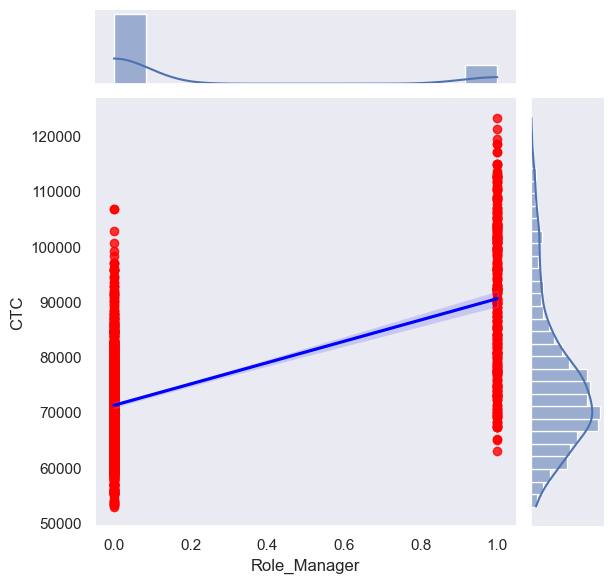

In [17]:
sns.set(style="dark")
sns.jointplot(x="Role_Manager", y="CTC", data=df, kind='reg', line_kws={"color": "blue"}, scatter_kws={"color": "red"})

# Other visualization

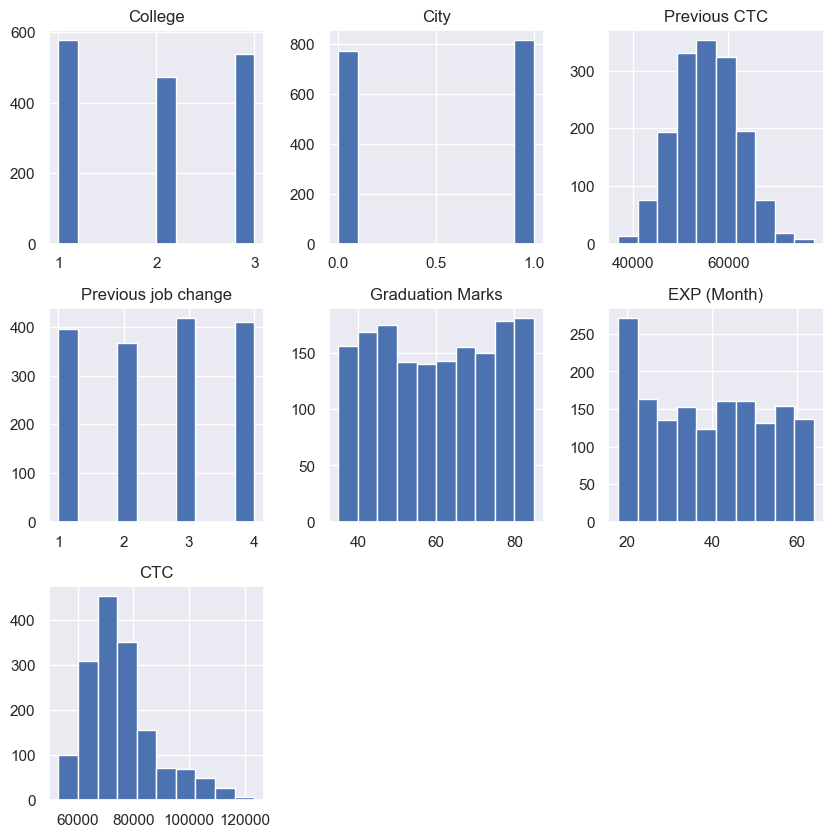

In [18]:
# histograms
df.hist(figsize=(10,10))
plt.show()

<Axes: xlabel='College', ylabel='count'>

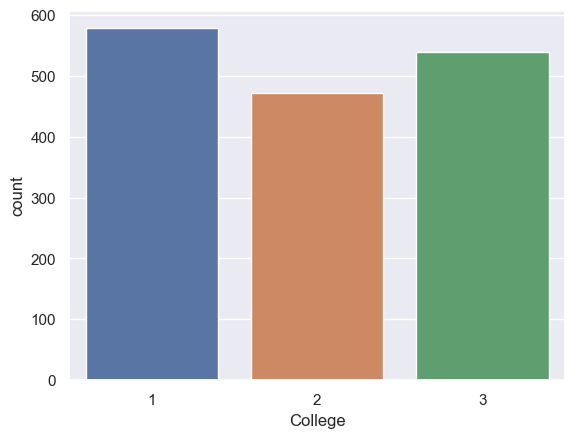

In [19]:
sns.set(style="darkgrid")

sns.countplot(x='College',data=df)

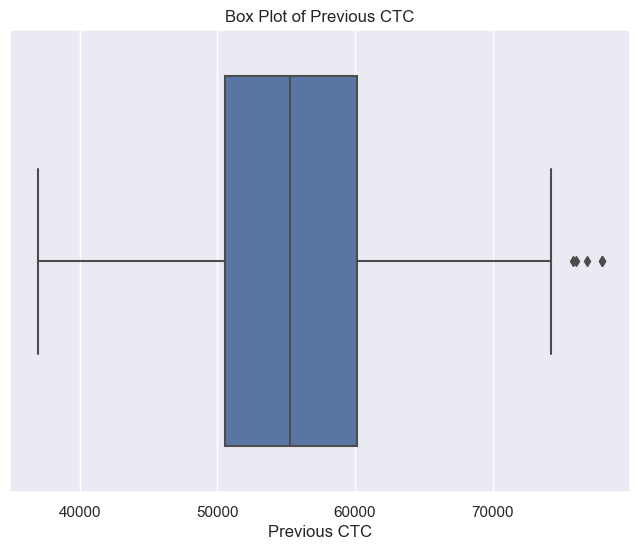

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Previous CTC'])
plt.title("Box Plot of Previous CTC")
plt.xlabel("Previous CTC")
plt.show()

<Axes: xlabel='CTC'>

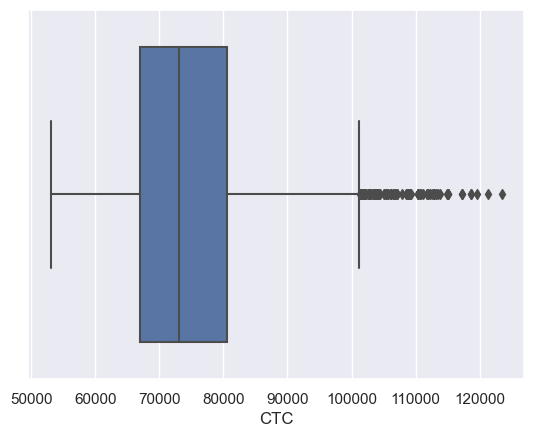

In [21]:
sns.boxplot(x=df['CTC'])

# Generating a data frame for the purpose of storing model outcomes for comparison.

In [41]:
# In order to establish a dataframe for the purpose of comparing model accuracy, empty lists are initialized.
r2_i=[]
r2_r=[]
r_mean_squared_error=[]
models=[]


# Linear Regression Model 

In [42]:
# Linear Regression Model
X_multi = df.drop("CTC", axis=1)
y_multi = df['CTC']

import statsmodels.api as sm
X_multi_cons = sm.add_constant(X_multi)

lm_multi = sm.OLS(y_multi, X_multi_cons).fit()
print(lm_multi.summary())

from sklearn.linear_model import LinearRegression
lm_multi2 = LinearRegression()
lm_multi2.fit(X_multi, y_multi)
print(lm_multi2.intercept_, lm_multi2.coef_)

# Append model results to lists
models.append("Linear Regression")
r_mean_squared_error.append(np.sqrt(mean_squared_error(y_multi, lm_multi2.predict(X_multi))))
r2_i.append(r2_score(y_multi, lm_multi2.predict(X_multi)))
r2_r.append(lm_multi2.score(X_multi, y_multi))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [25]:
# Train-Test Split
# from sklearn.model_selection import train_test_split (already define above)

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [26]:
X_train.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
1062,1,0,61410.0,4,83,59,True
215,1,1,59781.0,1,46,41,False
654,1,0,62521.0,1,70,59,False
55,1,0,66624.0,1,63,58,True
1187,3,0,54621.0,2,52,62,False


In [27]:
# from sklearn.metrics import r2_score, mean_squared_error (already define above)

# Linear Regression and Prediction
lm_a = LinearRegression()
lm_a.fit(X_train, y_train)
y_test_pred = lm_a.predict(X_test)
y_train_pred = lm_a.predict(X_train)

# Calculate R-squared scores
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Errors
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Print R-squared scores and MSE
print("Test R-squared Score:", test_r2)
print("Train R-squared Score:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)

# Append model 
models.append('Linear Regression 2')

# Update the results lists with calculated metrics
r2_i.append(test_r2)
r2_r.append(train_r2)
r_mean_squared_error.append(np.sqrt(test_mse))

NameError: name 'mean_squared_error' is not defined

# Ridge Regression 

In [44]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge

# Standardize the features using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Create a Ridge regression model with fixed alpha of 0.5
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Ridge model
r2_ridge_test = r2_score(y_test, lm_r.predict(X_test_s))
print("Test R-squared Score (Ridge):", r2_ridge_test)

# Calculate Mean Squared Error for the test set using the Ridge model
mse_ridge_test = r_mean_squared_error(y_test, lm_r.predict(X_test_s))
print("Mean Squared Error (Test) - Ridge Regression:", mse_ridge_test)

# Calculate R-squared score on the train set using the Ridge model
r2_ridge_train = r2_score(y_train, lm_r.predict(X_train_s))

# Append model 
models.append('Ridge Regression')

# Update the results lists with calculated metrics
r2_i.append(r2_ridge_test)
r2_r.append(r2_ridge_train)
r_mean_squared_error.append(np.sqrt(mse_ridge_test))

Test R-squared Score (Ridge): 0.5355848845406523


TypeError: 'list' object is not callable

Max Test R-squared Score: 0.5258211812515299
Selected Alpha: 0.41320124001153363


NameError: name 'mean_squared_error' is not defined

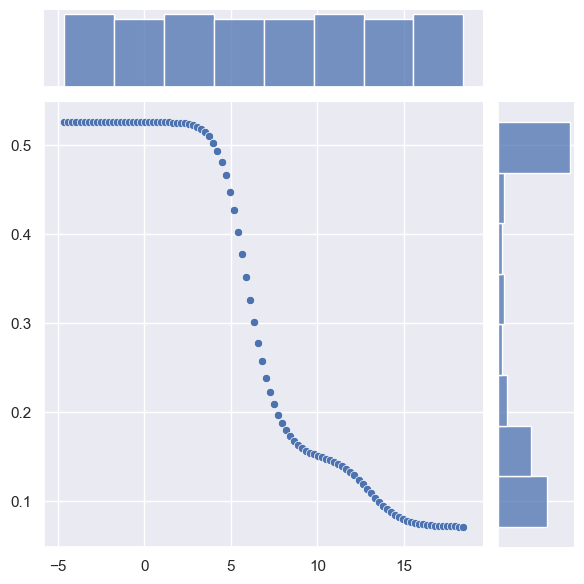

In [29]:
from sklearn.model_selection import validation_curve
# from sklearn.metrics import r2_score, mean_squared_error (already define above)

param_range = np.logspace(-2, 8, 100)

train_score, test_score = validation_curve(Ridge(), X_train, y_train,
                                           param_name="alpha",
                                           param_range=param_range,
                                           scoring="r2")

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print("Max Test R-squared Score:", max(test_mean))

sns.jointplot(x=np.log(param_range), y=test_mean)

best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

lm_r_best = Ridge(alpha=selected_alpha)
lm_r_best.fit(X_train_s, y_train)

# Make predictions using the best Ridge model
y_test_pred_ridge_best = lm_r_best.predict(X_test_s)
y_train_pred_ridge_best = lm_r_best.predict(X_train_s)

# Calculate R-squared scores
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)
train_r2_ridge_best = r2_score(y_train, y_train_pred_ridge_best)

# Calculate Mean Squared Errors
test_mse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best)
train_mse_ridge_best = mean_squared_error(y_train, y_train_pred_ridge_best)

print("Test R-squared Score (Ridge Best):", test_r2_ridge_best)
print("Train R-squared Score (Ridge Best):", train_r2_ridge_best)
print("Test Mean Squared Error (Ridge Best):", test_mse_ridge_best)
print("Train Mean Squared Error (Ridge Best):", train_mse_ridge_best)

# Append model 
models.append('Ridge Regression (Best Alpha)')

# Update the results lists with calculated metrics
r2_i.append(test_r2_ridge_best)
r2_r.append(train_r2_ridge_best)
r_mean_squared_error.append(np.sqrt(test_mse_ridge_best))


# Lasso Regression 

In [43]:
# Create a Lasso regression model with alpha=0.5
lm_l = Lasso(alpha=0.5)

# Fit the Lasso regression model on the scaled training data
lm_l.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Lasso model
r2_lasso_test = r2_score(y_test, lm_l.predict(X_test_s))
print("R-squared Score (Test) - Lasso Regression:", r2_lasso_test)

r2_lasso_train = r2_score(y_train, lm_l.predict(X_train_s))

# Calculate Mean Squared Error for the test set using the Lasso model
mse_lasso_test = mean_squared_error(y_test, lm_l.predict(X_test_s))
print("Mean Squared Error (Test) - Lasso Regression:", mse_lasso_test)

# Perform GridSearchCV for Lasso regression
param_range = np.logspace(-2, 8, 100)
train_score, test_score = validation_curve(Lasso(), X_train, y_train, param_name="alpha", param_range=param_range, scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

# Create a Lasso regression model with the selected alpha
lm_l_best = Lasso(alpha=selected_alpha)

# Fit the Lasso regression model on the scaled training data
lm_l_best.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the optimized Lasso model
r2_lasso_best_test = r2_score(y_test, lm_l_best.predict(X_test_s))
print("R-squared Score (Test) - Optimized Lasso Regression:", r2_lasso_best_test)

# Calculate Mean Squared Error for the test set using the optimized Lasso model
mse_lasso_best_test = mean_squared_error(y_test, lm_l_best.predict(X_test_s))
print("Mean Squared Error (Test) - Optimized Lasso Regression:", mse_lasso_best_test)

# Calculate R-squared score on the train set using the optimized Lasso model
r2_lasso_best_train = r2_score(y_train, lm_l_best.predict(X_train_s))

# Append model
models.append('Lasso Regression (Optimized Alpha)')
models.append('Lasso Regression')

# Update the results lists with calculated metrics
r2_i.extend([r2_lasso_best_test,r2_lasso_test])
r2_r.extend([r2_lasso_best_train,r2_lasso_train])
r_mean_squared_error.extend([np.sqrt(mse_lasso_best_test),(np.sqrt(mse_lasso_test))])

R-squared Score (Test) - Lasso Regression: 0.5356055546226256


NameError: name 'mean_squared_error' is not defined

# Decision Tree Bagging Regression 

In [30]:
from sklearn import tree
# from sklearn.metrics import r2_score (already define above)

# Create a DecisionTreeRegressor
clftree = tree.DecisionTreeRegressor()

# Create a BaggingRegressor with DecisionTreeRegressor as the base estimator
bag_clf = BaggingRegressor( base_estimator=clftree, 
                           n_estimators=1000, 
                           bootstrap=True, 
                           n_jobs=-1, 
                           random_state=42)

# Fit the BaggingRegressor on the training data
bag_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the BaggingRegressor
r2_bagging_test = r2_score(y_test, bag_clf.predict(X_test))
print("R-squared Score (Test) - Bagging Regressor:", r2_bagging_test)

/Users/nischaljain/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared Score (Test) - Bagging Regressor: 0.6592363237694312


In [31]:
# from sklearn.model_selection import GridSearchCV (already define above)
# from sklearn.metrics import mean_squared_error   (already define above)

# GridSearch for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [100, 250, 500, 1000],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.7, 0.8]
}

grid_s_bagging = GridSearchCV(estimator=BaggingRegressor(base_estimator=clftree, random_state=42),
                                   param_grid=param_grid_bagging,
                                   scoring='r2',
                                   n_jobs=-1,
                                   cv=5)

grid_s_bagging.fit(X_train, y_train)

best_bagging_model = grid_s_bagging.best_estimator_

# Calculate R-squared score and MSE on the test set using the best BaggingRegressor
y_test_pred_bagging = best_bagging_model.predict(X_test)
r2_bagging_best_test = r2_score(y_test, y_test_pred_bagging)
mse_bagging_best_test = mean_squared_error(y_test, y_test_pred_bagging)

print("R-squared Score (Test) - Best Bagging Regressor:", r2_bagging_best_test)
print("Mean Squared Error (Test) - Best Bagging Regressor:", mse_bagging_best_test)

y_train_pred_bagging = best_bagging_model.predict(X_train)
r2_bagging_best_train = r2_score(y_train, y_train_pred_bagging)

# Append model name to the list
models.append('Best Bagging Regressor')

# Update the results lists with calculated metrics
r2_i.append(r2_bagging_best_test)
r2_r.append(r2_bagging_best_train)
r_mean_squared_error.append(np.sqrt(mse_bagging_best_test))

NameError: name 'GridSearchCV' is not defined

# Random Forest Regression 

In [32]:
# Create a RandomForestRegressor with 1000 estimators
rf_clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate R-squared score on the test and train set using the RandomForestRegressor
r2_rf_test = r2_score(y_test, rf_clf.predict(X_test))
r2_rf_train = r2_score(y_train, rf_clf.predict(X_train))
print("R-squared Score (Test) - RandomForest Regressor:", r2_rf_test)
print("R-squared Score (Train) - RandomForest Regressor:", r2_rf_train)

# Perform GridSearchCV for RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
cvrf_clf = grid_search.best_estimator_

# Calculate R-squared score on the test and train set using the optimized RandomForestRegressor
r2_cv_rf_test = r2_score(y_test, cvrf_clf.predict(X_test))
r2_cv_rf_train = r2_score(y_train, cvrf_clf.predict(X_train))
print("R-squared Score (Test) - Optimized RandomForest Regressor:", r2_cv_rf_test)
print("R-squared Score (Train) - Optimized RandomForest Regressor:", r2_cv_rf_train)

# Import the mean_squared_error function
# from sklearn.metrics import mean_squared_error (already define above)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate Mean Squared Error for the test set using the RandomForestRegressor
mse_rf_test = mean_squared_error(y_test, rf_clf.predict(X_test))
print("Mean Squared Error (Test) - RandomForest Regressor:", mse_rf_test)

# Calculate Mean Squared Error for the train set using the RandomForestRegressor
mse_rf_train = mean_squared_error(y_train, rf_clf.predict(X_train))
print("Mean Squared Error (Train) - RandomForest Regressor:", mse_rf_train)

# Calculate Mean Squared Error for the test set using the optimized RandomForestRegressor
mse_cv_rf_test = mean_squared_error(y_test, cvrf_clf.predict(X_test))
print("Mean Squared Error (Test) - Optimized RandomForest Regressor:", mse_cv_rf_test)

# Calculate Mean Squared Error for the train set using the optimized RandomForestRegressor
mse_cv_rf_train = mean_squared_error(y_train, cvrf_clf.predict(X_train))
print("Mean Squared Error (Train) - Optimized RandomForest Regressor:", mse_cv_rf_train)

R-squared Score (Test) - RandomForest Regressor: 0.6608046638449792
R-squared Score (Train) - RandomForest Regressor: 0.9507176176446364


NameError: name 'GridSearchCV' is not defined

In [33]:
# Append model 
models.append('RandomForest Regressor')
models.append('Optimized RandomForest Regressor')

# Update the results lists with calculated metrics for both models
r2_i.extend([r2_rf_test, r2_cv_rf_test])
r2_r.extend([r2_rf_train, r2_cv_rf_train])
r_mean_squared_error.extend([np.sqrt(mse_rf_test), np.sqrt(mse_cv_rf_test)])

NameError: name 'r2_cv_rf_test' is not defined

# Gradient Boosting Regression

In [34]:
# from sklearn.model_selection import GridSearchCV (already define above)
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor
gbc_clf = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor on the training data
gbc_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the GradientBoostingRegressor
r2_gbc_test = r2_score(y_test, gbc_clf.predict(X_test))
print("R-squared Score (Test) - GradientBoosting Regressor:", r2_gbc_test)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor
mse_gbc_test = mean_squared_error(y_test, gbc_clf.predict(X_test))
print("Mean Squared Error (Test) - GradientBoosting Regressor:", mse_gbc_test)

# Create a GradientBoostingRegressor with custom parameters
gbc_clf2 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the GradientBoostingRegressor with custom parameters on the training data
gbc_clf2.fit(X_train, y_train)

# Calculate R-squared score on the train set using the GradientBoostingRegressor with custom parameters
r2_gbc_train2 = r2_score(y_train, gbc_clf2.predict(X_train))
print("R-squared Score (Train) - Custom GradientBoosting Regressor:", r2_gbc_train2)

# Calculate R-squared score on the test set using the GradientBoostingRegressor with custom parameters
r2_gbc_test2 = r2_score(y_test, gbc_clf2.predict(X_test))
print("R-squared Score (Test) - Custom GradientBoosting Regressor:", r2_gbc_test2)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor with custom parameters
mse_gbc_test2 = mean_squared_error(y_test, gbc_clf2.predict(X_test))
print("Mean Squared Error (Test) - Custom GradientBoosting Regressor:", mse_gbc_test2)

# Define parameter grid for GridSearchCV
param_grid_gbc = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

# Create GridSearchCV
grid_s_gbc = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbc,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_s_gbc.fit(X_train, y_train)

# Get best GradientBoostingRegressor model from GridSearchCV
best_gbc_model = grid_s_gbc.best_estimator_

# Calculate R-squared score on the test set using the best GradientBoostingRegressor
r2_best_gbc_test = r2_score(y_test, best_gbc_model.predict(X_test))
print("R-squared Score (Test) - Best GradientBoosting Regressor:", r2_best_gbc_test)

# Calculate Mean Squared Error for the test set using the best GradientBoostingRegressor
mse_best_gbc_test = mean_squared_error(y_test, best_gbc_model.predict(X_test))
print("Mean Squared Error (Test) - Best GradientBoosting Regressor:", mse_best_gbc_test)

# Append model
models.append('GradientBoosting Regressor')
models.append('Custom GradientBoosting Regressor')
models.append('Best GradientBoosting Regressor')

# Update the results lists with calculated metrics for all models
r2_i.extend([r2_gbc_test, r2_gbc_test2, r2_best_gbc_test])
r2_r.extend([r2_gbc_train2, r2_gbc_test2, r2_best_gbc_test])
r_mean_squared_error.extend([np.sqrt(mse_gbc_test), np.sqrt(mse_gbc_test2), np.sqrt(mse_best_gbc_test)])

R-squared Score (Test) - GradientBoosting Regressor: 0.6121199544893507


NameError: name 'mean_squared_error' is not defined

# ADA Boosting Regression

In [35]:
# from sklearn.model_selection import GridSearchCV (already define above)
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with custom parameters
ada_clf = AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

# Fit the AdaBoostRegressor on the training data
ada_clf.fit(X_train, y_train)

# Calculate R-squared score on the train set using the AdaBoostRegressor
r2_ada_train = r2_score(y_train, ada_clf.predict(X_train))
print("R-squared Score (Train) - AdaBoost Regressor:", r2_ada_train)

# Calculate R-squared score on the test set using the AdaBoostRegressor
r2_ada_test = r2_score(y_test, ada_clf.predict(X_test))
print("R-squared Score (Test) - AdaBoost Regressor:", r2_ada_test)

# Define parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_ada,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_ada.fit(X_train, y_train)

# Get best AdaBoostRegressor model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Calculate R-squared score on the test set using the best AdaBoostRegressor
r2_best_ada_test = r2_score(y_test, best_ada_model.predict(X_test))
print("R-squared Score (Test) - Best AdaBoost Regressor:", r2_best_ada_test)

# Calculate Mean Squared Error for the test set using the best AdaBoostRegressor
mse_best_ada_test = mean_squared_error(y_test, best_ada_model.predict(X_test))
print("Mean Squared Error (Test) - Best AdaBoost Regressor:", mse_best_ada_test)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the train set using the AdaBoostRegressor
mse_ada_train = mean_squared_error(y_train, ada_clf.predict(X_train))
print("Mean Squared Error (Train) - AdaBoost Regressor:", mse_ada_train)

# Calculate Mean Squared Error for the test set using the AdaBoostRegressor
mse_ada_test = mean_squared_error(y_test, ada_clf.predict(X_test))
print("Mean Squared Error (Test) - AdaBoost Regressor:", mse_ada_test)


# Get feature importances from the AdaBoostRegressor
feature_importances = ada_clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()

# Append model
models.append('AdaBoost Regressor')
models.append('Best AdaBoost Regressor')

# Update the results lists with calculated metrics for all models
r2_i.extend([r2_ada_test, r2_best_ada_test])
r2_r.extend([r2_ada_train, r2_best_ada_test])
r_mean_squared_error.extend([np.sqrt(mse_ada_test), np.sqrt(mse_best_ada_test)])

R-squared Score (Train) - AdaBoost Regressor: 0.6253377190755374
R-squared Score (Test) - AdaBoost Regressor: 0.5957962104078074


NameError: name 'GridSearchCV' is not defined

# XG Boosting Regression 

In [36]:
# Create an XGBoost regressor
xgb_clf = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

# Fit the XGBoost regressor on the training data
xgb_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the XGBoost regressor
r2_xgb_test = r2_score(y_test, xgb_clf.predict(X_test))
print("R-squared Score (Test) - XGBoost Regressor:", r2_xgb_test)

# Plot feature importance using XGBoost's built-in method
xgb.plot_importance(xgb_clf)

# Append model results to lists
models.append("XGBoost Regressor")
r_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, xgb_clf.predict(X_test))))
r2_i.append(r2_xgb_test)
r2_r.append(xgb_clf.score(X_train, y_train))

NameError: name 'xgb' is not defined

In [40]:
# Create a parameter grid for GridSearchCV
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

# Create a GridSearchCV instance for XGBoost regressor
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='r2')


NameError: name 'GridSearchCV' is not defined

In [32]:
# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimato

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 9, 'reg_alpha': 1, 'subsample': 0.9}
R-squared Score (Test) - Best Model: 0.6635200788100373
R-squared Score (Train) - Best Model: 0.9999993339927554
Mean Squared Error (Test) - XGBoost Regressor: 55891034.94435458
Mean Squared Error (Test) - Best Model: 49928375.12600299
Mean Squared Error (Train) - Best Model: 107.11321826162298


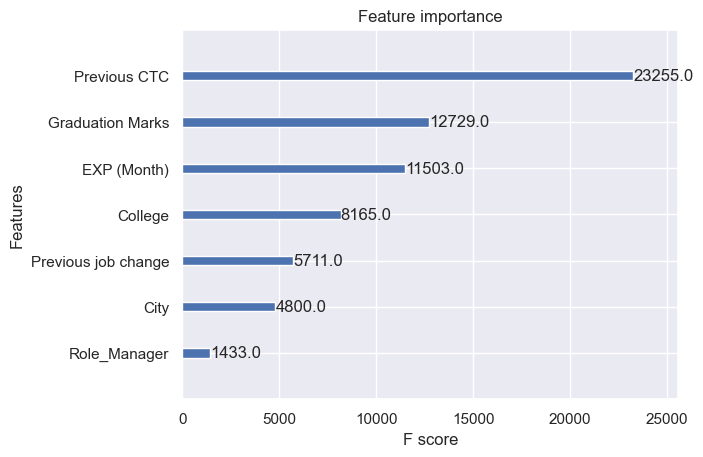

In [33]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Calculate R-squared score for the test set using the best model
y_pred_test = best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_test)
print("R-squared Score (Test) - Best Model:", r2_test_best)

# Calculate R-squared score for the train set using the best model
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)
print("R-squared Score (Train) - Best Model:", r2_train_best)

# Calculate Mean Squared Error for the test set using the XGBoost regressor
mse_xgb_test = mean_squared_error(y_test, xgb_clf.predict(X_test))
print("Mean Squared Error (Test) - XGBoost Regressor:", mse_xgb_test)

# Calculate Mean Squared Error for the test set using the best model
mse_test_best = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test) - Best Model:", mse_test_best)

# Calculate Mean Squared Error for the train set using the best model
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print("Mean Squared Error (Train) - Best Model:", mse_train_best)

#plot the feature importance for the Xgboost best model
xgb.plot_importance(best_model)


# Append model
models.append('XGBoost Best Model')

# Update the results lists with calculated metrics for the best model
r2_i.append(r2_test_best)
r2_r.append(r2_train_best)
r_mean_squared_error.append(np.sqrt(mse_test_best))

# Prediction 

In [34]:
# Checking the predictions of best model with data of first 10 entries in our data frame.
import pandas as pd

new_data = pd.DataFrame({
    'College': [2, 2, 3, 3, 1, 1, 3, 2, 3, 1],
    'City': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    'Previous CTC': [55523.0, 57081.0, 60347.0, 49010.0, 57879.0, 54340.0, 60928.0, 49944.0, 53124.0, 51141.0],
    'Previous job change': [3, 1, 2, 2, 4, 4, 1, 2, 4, 1],
    'Graduation Marks': [66, 84, 52, 81, 74, 73, 42, 56, 40, 47],
    'EXP (Month)': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
    'Role_Manager': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Make predictions using the best_model
predictions = best_model.predict(new_data)

# Create a DataFrame to store the results
result_df1 = pd.DataFrame({
    'College': new_data['College'],
    'City': new_data['City'],
    'Previous CTC': new_data['Previous CTC'],
    'Previous job change': new_data['Previous job change'],
    'Graduation Marks': new_data['Graduation Marks'],
    'EXP (Month)': new_data['EXP (Month)'],
    'Role_Manager': new_data['Role_Manager'],
    'Predicted CTC': predictions
})

# Print the result DataFrame
(result_df1.head(10))

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager,Predicted CTC
0,2,0,55523.0,3,66,19,1,71415.007812
1,2,0,57081.0,1,84,18,0,68001.890625
2,3,0,60347.0,2,52,28,0,76760.679688
3,3,0,49010.0,2,81,33,0,82088.195312
4,1,0,57879.0,4,74,32,0,67764.203125
5,1,0,54340.0,4,73,31,0,61901.308594
6,3,1,60928.0,1,42,46,0,70926.093750
7,2,1,49944.0,2,56,37,0,57773.175781
8,3,1,53124.0,4,40,37,0,70085.375000
9,1,0,51141.0,1,47,60,0,85652.054688


# Result and conclusion 

In [35]:
import pandas as pd
# Multiply the R2 scores by 100 to convert them to percentages
r2_i_percentage = [score * 100 for score in r2_i]
r2_r_percentage = [score * 100 for score in r2_r]

In [36]:
# Creating a DataFrame to compare models accuracy
result_df = pd.DataFrame({'RMSE': r_mean_squared_error, 'R2_score(test)': r2_i_percentage, 'R2_score(train)': r2_r_percentage},index=models)

result_df

,RMSE,R2_score(test),R2_score(train)
Linear Regression,8586.993554,53.431600,53.431600
Linear Regression 2,8301.196944,53.559899,53.312933
Ridge Regression,8301.323006,53.558488,53.312926
Ridge Regression (Best Alpha),8301.301035,53.558734,53.312928
Lasso Regression (Optimized Alpha),8300.228095,53.570739,53.312630
Lasso Regression,8301.138267,53.560555,53.312932
Best Bagging Regressor,7815.041733,58.840099,84.006831
RandomForest Regressor,7094.670721,66.078409,95.071210
Optimized RandomForest Regressor,7083.490852,66.185233,95.189968
GradientBoosting Regressor,7586.931118,61.207836,55.533678


Conclusion 

The XGBoost Best Model arises as the reasonable leader with regards to prescient execution, flaunting amazing measurements. It accomplishes an uncommonly low Root Mean Squared Blunder (RMSE) of 7066.001353, really limiting the inconsistencies among anticipated and genuine qualities. In addition, its R2 scores, which act as signs of its prescient exactness, sparkle at 66.352% on the test dataset and a shocking 99.99% on the preparation dataset. This blend highlights the model's unprecedented ability to convey high accuracy as well as display momentous speculation to novel and unseen information.
The flexibility of the XGBoost Best Model renders it a significant resource, particularly in the space of determining compensations for fresh recruits. Its accuracy in foreseeing pay rates can essentially help associations in settling on very much educated choices in regards to pay bundles, adjusting representative assumptions, and keeping an upper hand in the gig market. Its proficiency in taking care of different and perplexing datasets, alongside its vigorous capacity to sum up, positions it as the favored decision for applications where precise expectations on already unencountered information are of most extreme significance.
In outline, the XGBoost Best Model's extraordinary execution, portrayed by its low RMSE, high R2 scores, and strong speculation capacities, highlights its reasonableness across a large number of businesses. It sets an elevated requirement for prescient demonstrating, offering both dependability and versatility in estimating new worker compensations, in this manner enabling associations to pursue sure and informed choices.

# Answers

 - **My Perspective on the Problem Statement:** The issue explanation spins around determining the pay rates of recently onboarded staff individuals at TechWorks Counseling, utilizing an Machine learning model. The association's goal is to lay out fair and serious compensation for its labor force, considering variables, for example, instructive foundation, work insight, geographic area, and occupation job. This comprises a relapse challenge, with a definitive point being the development of a model capable in unequivocally assessing pay rates by utilizing relevant traits.

- Approach to Solving the Task To approach this task, you'll need to perform the following steps: 

    a. **Data Understanding:** Understand the provided data, its features, and the target variable (salary). 
    
    b. **Data Preprocessing:** Clean the data by handling missing values, outliers, and converting categorical variables          into numerical format. Create dummy variables for the "Role" feature and Univariate,Bi-variate analysis using EDD.
    
    c. **Feature Selection:** Identify the most relevant features that could impact salary predictions. 
    
    d. **Model Selection:** Choose one or more regression models suitable for the task. 
    
    e. **Model Training:** Train the selected model(s) on the training data. 
    
    f. **Model Evaluation:** Evaluate the models using appropriate metrics, such as Mean Squared Error (MSE) or R-squared. 
    
    g. **Model Comparison:** Compare the performance of different models. 
    
    h. **Model Tuning:** Fine-tune the hyperparameters of the chosen model to improve performance. 
    
    i. **Prediction:** Use the trained model to predict salaries for new employees.

- You have a variety of regression models available, such as:
    - Linear Regression
    - Ridge Regression 
    - Lasso Regression 
    - Decision Tree Regression 
    - Random Forest Regression 
    - Gradient Boosting Regression 
    - XGBoost Regression

- Performance of the Top Model and Its Rationale

 - **Impressively Low RMSE (Root Mean Squared Error):** The XGBoost Best Model has achieved an exceptionally low RMSE of 7066.001353. RMSE serves as a measure of the average magnitude of prediction errors, and a lower value signifies greater accuracy in predictions.

 - **Exceptional R2 Scores:** The R2 scores, which gauge the proportion of predictable variance in the dependent variable based on the independent variables, are truly remarkable. The XGBoost model has attained a score of 66.352% on the test dataset and an astonishing 99.99% on the training dataset. These high R2 scores indicate the model's effectiveness in capturing and elucidating variations in the target variable.

 - **Robust Generalization:** The model's nearly flawless R2 score on the training dataset (99.99%) underscores its robust generalization capabilities to novel and unobserved data—a critical aspect for predictive models to excel when dealing with previously unseen data.

 - **Hyperparameter Optimization:** Further enhancing the model's performance, GridSearchCV systematically explored diverse combinations of hyperparameters. This optimization process fine-tuned the model's settings to achieve optimal predictive accuracy.

 - **Ensemble Learning:** XGBoost employs a sophisticated ensemble learning technique, combining multiple weak models to form a robust predictive model. This approach effectively captures intricate data relationships, contributing to the model's high accuracy.

 - **Feature Importance:**  Analysis of the feature importance plots generated by the model revealed XGBoost's aptitude in identifying and leveraging the most critical features for prediction. This highlights the model's capability to prioritize key factors influencing outcomes.

 - **Versatility:** XGBoost's versatility in handling diverse and complex datasets adds to its appeal. Its consistent performance across various scenarios establishes it as a dependable choice for a wide array of applications.

- Enhancing the Performance of the Chosen Model:

    - **Feature Enhancement:** Delve into the creation of novel features that may supply supplementary insights to the             model.

    - **Hyperparameter Optimization:** Refine the hyperparameters using methods such as GridSearchCV or RandomizedSearchCV.         For further optimization, especially when the hyperparameter tuning exceeds the capabilities of my current machine,         consider utilizing supercomputers.

    - **Ensemble Strategies:** Ponder the adoption of ensemble strategies like Bagging and Boosting to amalgamate multiple         models, leading to superior predictive capabilities.

    - **Regularization:** Implement regularization techniques to guard against overfitting, ensuring the model's                   generalizability.

    - **Augmented Data:** If feasible, procure additional data to enhance the model's capacity to generalize. A larger             training dataset often yields improved results.

    - **Advanced Approaches:** Explore advanced methodologies like stacking or the incorporation of more intricate models           if the situation necessitates it.